##### Advanced Statistical Analysis and Model-Based Learning (Fall 2024-2025)
# Home Assignment 3
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples
- ANOVA

#### Due: 23/12/2024 by 18:30

#### Instructions:
- Write your IDs and date at the top cell.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (preferred) or submit additional notes.

<hr>
<hr>

## Problem 1 (Correlated Data)

Suppose that $Y_1,\ldots,Y_n$ has each mean $\mu$ and variance $\sigma^2$, but
$$
\rho_{ij} := \mathrm{Corr}(Y_i,Y_j) = \begin{cases}
1 & i=j \\
\rho & |i-j| = 1 \\
0 & |i-j| > 1
\end{cases}.
$$
This situation arises when an observation $i$ may depend to some extent on only the previous observation’s white noise: a one-lag "holdover effect". This is also known as the "lag-1 moving average" model (MA(1)).

1. Show that:

1.1. $$\mathrm{Var}(\bar{Y}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$
Namely, positive correlation increases varaince. Hint: use that $\mathrm{Var}(U+V) = \mathrm{Var}(U) + \mathrm{Var}(V) + 2 \mathrm{Cov}(U,V)$ and induction or recursive computation over $n$. Another option is to write $Y = \Sigma^{1/2}Z$ where $Z\sim \mathcal N(0,I)$ and $\Sigma^{1/2}$ is symmetric with $\Sigma^{1/2}\Sigma^{1/2} = \Sigma$ has the desired covariance stracture.  

1.2. $\mathbb E[s^2] = \sigma^2(1 - 2\rho/n)$, where $s^2$ is the standard variance estimate.
Namely, with positive correlation the "variety" in the data is smaller.

1.3. **(Bonus)** The t-statistic statisfies
$$
t = \sqrt{n} \frac{\bar{Y}-\mu}{s} \to \mathcal N(0,1 + 2 \rho),\quad n \to \infty
$$
Hint: you may use the following version of Slutsky's Theorem: for two sequences of RV $U_n$ and $V_n$, if $U_n \overset{D}{\to} U$ and $V_n \overset{p}{\to} c$ (constant), then $V_n U_n \overset{D}{\to} cU$

2. Verify your answer to the first two items in 1 using simulations. Use `nMonte = 10000` problem instances. In each instance, use a sample size of `n = 10` with $\sigma=1$ and $\rho \in \{\pm 0.1, \pm 0.3, \pm0.5\}$. The function `genrate_correlated_data` below generates noramlly distributed data satisfying the correlation model above.

3. Suppose $\rho>0$

 3.1. Derive a $1-\alpha$ confidence interval based on $s$ and the $t$-distribution with $n-1$ DoF. Does your interval
 contain the value of $\mu$ more or less often than $1-\alpha$? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$.

 3.2. Suppose that we reject $H_0\,:\,\mu = \mu_0$ whenever $|t|$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$. Would our P-value be too small or too large? Would we reject more or less often then $\alpha$ if the null $\mu = \mu_0$ is true? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$.

 3.3. Would your answer to the preivous two items change if $\rho < 0$? how?

The point: correlation in our data is bad because it makes us make wrong descisions. The effect of correlation is much worst than non-nomrality since the latter diminishes with $n$ due to the CLT.


In [1]:
import numpy as np
def generate_correlated_data(n: int, rho: float, mu: float, sigma: float) -> np.ndarray:
    """
    Generate samples from the model:
    Yi ~ N(mu, sigma^2) and Corr(Yi,Yj) = ( i == j ) + rho * ( abs( i - j ) == 1 )

    Args:
    -----
    :n:     sample size
    :rho:   desired one lag correlation between samples
    :mu:    mean
    :sigma: standard deviation

    """
    assert sigma > 0

    # build desired covariance matrix
    Sig = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i==j :
                Sig[i,j] = 1
            if np.abs(i-j) == 1:
                Sig[i,j] = rho
                Sig[j,i] = rho

    # get matrix square root of covariance matrix:
    Sig_sqrt = np.linalg.cholesky(sigma**2 * Sig)

    # sample from the standard normal dist. and transform
    # so that the result is a normal vector with the desired
    # covariance structure
    return mu + Sig_sqrt @ np.random.randn(n)


1.1<br>
$\bar{Y} = \frac{1}{n}\sum_{i=1}^{n} Y_i$

Hence, $$\mathrm{Var}(\bar{Y}) = \mathrm{Var}(\frac{1}{n}\sum_{i=1}^{n} Y_i) = \frac{1}{n^2} \mathrm{Var}(\sum_{i=1}^{n} Y_i)$$

We expend the term $\mathrm{Var}(\sum_{i=1}^{n} Y_i)$:
$$\mathrm{Var}(\sum_{i=1}^{n} Y_i) =$$
$$\mathrm{Var}(Y_1 + Y_2 + \dots + Y_n) =$$
$$\mathrm{Var}(Y_1) + \mathrm{Var}(Y_2 + Y_3 + \dots + Y_n)  + 2 \mathrm{Cov}(Y_1, Y_2 + Y_3 + \dots + Y_n) =$$
$$\mathrm{Var}(Y_1) + \mathrm{Var}(Y_2) + \mathrm{Var}(Y_3 + Y_4 + \dots + Y_n) + 2 \mathrm{Cov}(Y_1, Y_2 + Y_3 + \dots + Y_n)  + 2 \mathrm{Cov}(Y_2, Y_3 + Y_4 + \dots + Y_n) =$$
$$\sum_{i=1}^{n} \mathrm{Var}(Y_i) + \sum_{i=1}^{n-1} [2 \mathrm{Cov}(Y_i, Y_{i+1} + Y_{i+2} \dots + Y_n)] =$$
$$\sum_{i=1}^{n} \mathrm{Var}(Y_i) + 2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1} + Y_{i+2} \dots + Y_n)$$

LHS: $\sum_{i=1}^{n} \mathrm{Var}(Y_i) = n\sigma^2$

RHS: $2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1} + Y_{i+2} \dots + Y_n) = 2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1})$ because "an observation $i$ may depend to some extent on only the previous observation’s white noise" (MA(1)).<br>
Also, $\mathrm{Cov}(Y_i, Y_{i+1}) = \mathrm{Corr}(Y_i, Y_{i+1}) \sigma_{Y_i} \sigma_{Y_{i+1}} = \rho \sigma \sigma = \rho \sigma^2$<br>
And so, RHS == $2 (n-1) \rho \sigma^2$

Putting it all together:
$$\mathrm{Var}(\bar{Y}) =$$
$$\frac{1}{n^2} \mathrm{Var}(\sum_{i=1}^{n} Y_i) =$$
$$\frac{1}{n^2} [\sum_{i=1}^{n} \mathrm{Var}(Y_i) + 2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1} + Y_{i+2} \dots + Y_n)] =$$
$$\frac{1}{n^2} [n\sigma^2 + 2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1}] =$$
$$\frac{1}{n^2} [n\sigma^2 + (n-1) 2 \rho \sigma^2] =$$
$$\frac{n \sigma^2}{n^2} + \frac{(n-1) 2 \rho \sigma^2}{n^2} =$$
$$\frac{\sigma^2}{n} + \frac{(n-1) 2 \rho \sigma^2}{n^2} =$$
$$\frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$

In [2]:
import numpy as np

nMonte = 10000
n = 10
mu = 0.0
sigma = 1
rho_options = np.array([0.5, 0.3, 0.1])
rho_options = np.concatenate((rho_options, -1 * rho_options))

rhos = np.zeros(nMonte)

X = np.zeros((nMonte,n))
for i in range(nMonte):
    rho = np.random.choice(rho_options)
    rhos[i] = rho
    X[i,:] = generate_correlated_data(n, rho, mu, sigma)

In [3]:
for rho in rho_options:
    samples = X[rhos == rho,:]
    y_bar = np.mean(samples, axis=1)
    var_y_bar = np.var(y_bar)
    expected = ((sigma**2) / n) * (1 + 2 * rho * (n-1)/n)

    print(f"For rho = {rho}:")
    print(f"  Calculated var_y_bar: {var_y_bar}")
    print(f"  Expected var_y_bar: {expected}")
    print(f"  Assertion result: {np.isclose(expected, var_y_bar, atol=0.05)}")
    print()

    assert np.isclose(expected, var_y_bar, atol=0.05)

For rho = 0.5:
  Calculated var_y_bar: 0.1865802395973696
  Expected var_y_bar: 0.19
  Assertion result: True

For rho = 0.3:
  Calculated var_y_bar: 0.14966334866462103
  Expected var_y_bar: 0.15400000000000003
  Assertion result: True

For rho = 0.1:
  Calculated var_y_bar: 0.1105407908411012
  Expected var_y_bar: 0.118
  Assertion result: True

For rho = -0.5:
  Calculated var_y_bar: 0.010356452809268692
  Expected var_y_bar: 0.009999999999999998
  Assertion result: True

For rho = -0.3:
  Calculated var_y_bar: 0.045396773530000115
  Expected var_y_bar: 0.04600000000000001
  Assertion result: True

For rho = -0.1:
  Calculated var_y_bar: 0.08230047093792787
  Expected var_y_bar: 0.08200000000000002
  Assertion result: True



1.2<br>
$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2$

$$\sum_{i=1}^{n} (Y_i - \bar{Y})^2 =$$
$$\sum_{i=1}^{n} (Y_i^2 - 2 Y_i \bar{Y} + \bar{Y}^2) =$$
$$\sum_{i=1}^{n} (Y_i^2) - 2 \sum_{i=1}^{n}(Y_i \bar{Y}) + \sum_{i=1}^{n} (\bar{Y}^2) =$$
$$\sum_{i=1}^{n} (Y_i^2) - 2 \bar{Y} \sum_{i=1}^{n}(Y_i) + n \bar{Y}^2 =$$
$$\sum_{i=1}^{n} (Y_i^2) - 2 \bar{Y} n \bar{Y} + n \bar{Y}^2 =$$

(because $\bar{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i$)

$$\sum_{i=1}^{n} (Y_i^2) - 2 n \bar{Y}^2 + n \bar{Y}^2 =$$
$$\sum_{i=1}^{n} (Y_i^2) - n \bar{Y}^2$$


So,
$$\qquad \mathbb{E}[{s^2}] = \mathbb{E}[\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2] =$$
$$\frac{1}{n-1} \mathbb{E}[\sum_{i=1}^{n} (Y_i - \bar{Y})^2] =$$
$$\frac{1}{n-1} \mathbb{E}[\sum_{i=1}^{n} (Y_i^2) - n \bar{Y}^2] =$$
$$\frac{1}{n-1} \big( \mathbb{E}[\sum_{i=1}^{n} (Y_i^2)] - \mathbb{E}[n \bar{Y}^2] \big) =$$
$$\frac{1}{n-1} \big( \mathbb{E}[\sum_{i=1}^{n} (Y_i^2)] - n \mathbb{E}(\bar{Y}^2) \big) =$$

and $\mathrm{Var}(X) = \mathbb{E}(X^2) - \mathbb{E}^2 (X)$

$$\frac{1}{n-1} \big( \mathbb{E}[\sum_{i=1}^{n} (Y_i^2)] - n [\mathrm{Var}(\bar{Y}) + \mathbb{E}^2(\bar{Y})] \big) =$$

and $\mathbb{E}^2(\bar{Y}) = \mathbb{E}(\bar{Y}) \mathbb{E}(\bar{Y}) = \mathbb{E}(Y_i) \mathbb{E}(Y_i) = \mathbb{E}^2(Y_i) = \mu^2$

$$\frac{1}{n-1} \big( \mathbb{E}[\sum_{i=1}^{n} (Y_i^2)] - n [\mathrm{Var}(\bar{Y}) + \mu^2] \big) =$$
$$\frac{1}{n-1} \big( \mathbb{E}[\sum_{i=1}^{n} (Y_i^2)] - n [\frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n}) + \mu^2] \big) =$$
$$\frac{1}{n-1} \big( \mathbb{E}[\sum_{i=1}^{n} (Y_i^2)] - \sigma^2 (1 + 2\rho \frac{n-1}{n}) - n \mu^2 \big) =$$

$\mathbb{E}[\sum_{i=1}^{n} (Y_i^2)] = \sum_{i=1}^{n} \mathbb{E}(Y_i^2) = \sum_{i=1}^{n} (\sigma^2 + \mu^2) = n \sigma^2 + n \mu^2$

$$\frac{1}{n-1} \big[ n \sigma^2 + n \mu^2 - \sigma^2 (1 + 2\rho \frac{n-1}{n}) - n \mu^2 \big] =$$
$$\frac{1}{n-1} \big[ n \sigma^2 - \sigma^2 (1 + 2\rho \frac{n-1}{n}) \big] =$$
$$\frac{\sigma^2}{n-1} (n - 1 - 2\rho \frac{n-1}{n}) =$$
$$ \frac{\sigma^2 (n-1)}{n-1} (1 -\frac{2\rho}{n}) =$$
$$ \sigma^2 (1 - \frac{2\rho}{n})$$


In [4]:
for rho in rho_options:
    samples = X[rhos == rho, :]
    s2 = np.var(samples, ddof=1, axis=1)

    actual = np.mean(s2)
    expected = (sigma**2) * (1 - 2 * rho / n)

    print(f"For rho = {rho}:")
    print(f"  Calculated sample variance (s2): {actual}")
    print(f"  Expected sample variance (E[s2]): {expected}")
    print(f"  Assertion result: {np.isclose(expected, actual, atol=0.05)}")
    print()

    assert np.isclose(expected, actual, atol=0.05)

For rho = 0.5:
  Calculated sample variance (s2): 0.9001129086077071
  Expected sample variance (E[s2]): 0.9
  Assertion result: True

For rho = 0.3:
  Calculated sample variance (s2): 0.9424345548218449
  Expected sample variance (E[s2]): 0.94
  Assertion result: True

For rho = 0.1:
  Calculated sample variance (s2): 0.9618517621416472
  Expected sample variance (E[s2]): 0.98
  Assertion result: True

For rho = -0.5:
  Calculated sample variance (s2): 1.116213897516338
  Expected sample variance (E[s2]): 1.1
  Assertion result: True

For rho = -0.3:
  Calculated sample variance (s2): 1.0608173365154967
  Expected sample variance (E[s2]): 1.06
  Assertion result: True

For rho = -0.1:
  Calculated sample variance (s2): 1.0137777696501207
  Expected sample variance (E[s2]): 1.02
  Assertion result: True



1.3<br>
$t = \sqrt{n} \frac{\bar{Y} - \mu}{s} $ <br>
$t \to \mathcal{N}(0, 1 + 2\rho), \quad \text{as } n \to \infty$

$$t = \left( \sqrt{n} \frac{\bar{Y} - \mu}{s} \right) \left( \frac{\sigma}{\sigma} \right) =\frac{\sqrt{n} \frac{\bar{Y} - \mu}{\sigma}}{s / \sigma} $$

Applying the CLT to the numerator of the t-statistic:
$$\frac{\sqrt{n} (\bar{Y} - \mu)}{\sigma} \to \mathcal{N}(0, 1), \quad \text{as } n \to \infty$$

Analyzing the Denominator: <br>
from Problem 1b: $$\mathbb{E}[s^2] = \sigma^2 \left( 1 - \frac{2\rho}{n} \right)$$
$$\mathbb{E}[s^2] \to \sigma^2, \quad \text{as } n \to \infty$$
$$s \to \sigma, \quad \text{as } n \to \infty$$

Invoking Slutsky's Theorem:
$$t = \frac{\sqrt{n} (\bar{Y} - \mu)}{\sigma} / \frac{s}{\sigma} \to 1 \cdot \mathcal{N}(0, 1) = \mathcal{N}(0, 1), \quad \text{as } n \to \infty$$

and we know that the variance of the sample mean ($\bar{Y}$) for an MA(1) process is given by:
$$\text{Var}(\bar{Y}) = \frac{\sigma^2}{n} \left( 1 + 2\rho \frac{n-1}{n} \right)$$
if:
$$ \text{Var} \left( \frac{\sqrt{n} (\bar{Y} - \mu)}{\sigma} \right) = $$
$$\left( \frac{\sqrt{n}}{\sigma} \right)^2 \text{Var}(\bar{Y} - \mu) = \frac{n}{\sigma^2} \text{Var}(\bar{Y})=$$
$$\frac{n}{\sigma^2} \left[ \frac{\sigma^2}{n} \left( 1 + 2\rho \frac{n-1}{n} \right) \right]$$

so:
$$\text{Var} \left( \frac{\sqrt{n} (\bar{Y} - \mu)}{\sigma} \right) = 1 + 2\rho \frac{n-1}{n}$$
$$1 + 2\rho \frac{n-1}{n} \to 1 + 2\rho, \quad \text{as } n \to \infty$$

Slutsky's Theorem and the CLT, we obtain:
$$t \to \mathcal{N}(0, 1 + 2\rho), \quad \text{as } n \to \infty$$


2

In [5]:
nMonte = 10000
n = 10
std = 1
rho_list = [0.1, -0.1, 0.3, -0.3, 0.5, -0.5]

for rho in rho_list:
    instances = [generate_correlated_data(n=n, rho=rho, mu=0, sigma=std) for i in range(nMonte)]

    # bullet 1
    y_bar = [np.mean(x) for x in instances]
    var_y_bar_formula = (std ** 2 / n) * (1 + (2 * rho * (n - 1) / n))

    # bullet 2
    s = [np.sum(np.square(instances[i] - y_bar[i])) / (n - 1) for i in range(len(y_bar))]
    exp_s_squared_formula = std ** 2 * (1 - (2 * rho / n))

    print(f'rho = {rho}:\n\t'
          f'Var(Y-bar)         = {np.var(y_bar)}\n\t'
          f'Var(Y-bar) formula = {var_y_bar_formula}\n\t'
          f'E(s^2)             = {np.mean(s)}\n\t'
          f'E(s^2) formula     = {exp_s_squared_formula}\n')

rho = 0.1:
	Var(Y-bar)         = 0.12042192598723497
	Var(Y-bar) formula = 0.118
	E(s^2)             = 0.9792819378449933
	E(s^2) formula     = 0.98

rho = -0.1:
	Var(Y-bar)         = 0.08188921878635479
	Var(Y-bar) formula = 0.08200000000000002
	E(s^2)             = 1.0170429498173459
	E(s^2) formula     = 1.02

rho = 0.3:
	Var(Y-bar)         = 0.15128035560067316
	Var(Y-bar) formula = 0.15400000000000003
	E(s^2)             = 0.9428501812327157
	E(s^2) formula     = 0.94

rho = -0.3:
	Var(Y-bar)         = 0.04645231625782577
	Var(Y-bar) formula = 0.04600000000000001
	E(s^2)             = 1.0599851024927849
	E(s^2) formula     = 1.06

rho = 0.5:
	Var(Y-bar)         = 0.19174359361800622
	Var(Y-bar) formula = 0.19
	E(s^2)             = 0.9012097104271204
	E(s^2) formula     = 0.9

rho = -0.5:
	Var(Y-bar)         = 0.009844765746454176
	Var(Y-bar) formula = 0.009999999999999998
	E(s^2)             = 1.096954611646621
	E(s^2) formula     = 1.1



3.

In [6]:
import scipy.stats as stats

def q_3(nMonte: int, n: int, alpha: float, std: float, mu: float, rho: float):
    mu_in_interval_counter = 0  # a
    t_statistic_exceeds_critical_value_counter = 0  # b

    for i in range(nMonte):
        y = generate_correlated_data(n=n, rho=rho, mu=mu, sigma=std)
        mu_hat = np.mean(y)
        s = np.sqrt(np.sum((mu_hat - y) ** 2) / (n - 1))

        # a
        interval = stats.t.interval(confidence=1 - alpha, df=(n - 1), loc=mu, scale=(s / np.sqrt(n)))

        if interval[0] <= mu_hat <= interval[1]:
            mu_in_interval_counter = mu_in_interval_counter + 1

        # b
        t_statistic = (mu_hat - mu) / (s / np.sqrt(n))
        t_critical_value = stats.t.ppf(1 - (alpha / 2), df=n - 1)

        if t_statistic > t_critical_value:
            t_statistic_exceeds_critical_value_counter = t_statistic_exceeds_critical_value_counter + 1

    return mu_in_interval_counter, t_statistic_exceeds_critical_value_counter

In [7]:
nMonte = 10000
n = 100
alpha = 0.05
std = 1
mu = 2

In [8]:
positive_rho_mu_in_interval_counter, positive_rho_t_statistic_exceeds_critical_value_counter = q_3(nMonte, n, alpha,std, mu, rho=0.25)

In [9]:
# 3.1. Does your interval contain the value of mu more or less often than 1-alpha?
if (positive_rho_mu_in_interval_counter / nMonte) >= (1 - alpha):
    result_a = 'more'
else:
    result_a = 'less'

print(f'The interval contained mu {positive_rho_mu_in_interval_counter / nMonte}% of the times.')
print(f'So {result_a} often than 1-alpha ({1 - alpha})')

The interval contained mu 0.8963% of the times.
So less often than 1-alpha (0.95)


In [10]:
# 3.2 Would we reject more or less often than alpha if the null mu = mu_0 is true?
if (positive_rho_t_statistic_exceeds_critical_value_counter / nMonte) >= alpha:
    result_b = 'more'
else:
    result_b = 'less'

print(
    f'We reject the null hypothesis {positive_rho_t_statistic_exceeds_critical_value_counter / nMonte}% of the times.')
print(f'So {result_b} often than alpha ({alpha})')

We reject the null hypothesis 0.0525% of the times.
So more often than alpha (0.05)


In [11]:
# 3.3
negative_rho_mu_in_interval_counter, negative_rho_t_statistic_exceeds_critical_value_counter = q_3(nMonte, n, alpha,
                                                                                                   std, mu, rho=-0.25)

In [12]:
# 3.3.1. Does your interval contain the value of mu more or less often than 1-alpha?
if (negative_rho_mu_in_interval_counter / nMonte) >= (1 - alpha):
    result_a = 'more'
else:
    result_a = 'less'

print(f'The interval contained mu {negative_rho_mu_in_interval_counter / nMonte}% of the times.')
print(f'So {result_a} often than 1-alpha ({1 - alpha})')

The interval contained mu 0.9945% of the times.
So more often than 1-alpha (0.95)


In [13]:
# 3.3.2. Would we reject more or less often than alpha if the null mu = mu_0 is true?
if (negative_rho_t_statistic_exceeds_critical_value_counter / nMonte) >= alpha:
    result_b = 'more'
else:
    result_b = 'less'

print(
    f'We reject the null hypothesis {negative_rho_t_statistic_exceeds_critical_value_counter / nMonte}% of the times.')
print(f'So {result_b} often than alpha ({alpha})')

We reject the null hypothesis 0.0029% of the times.
So less often than alpha (0.05)


Negative correlation $\rho < 0$ in the data leads to larger p-values, making the test more conservative and less likely to reject the null hypothesis

## Problem 2 (Variance Estimation)

Consider the variance estimate
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n(y_i - \bar{y})^2.
$$
If $y_i \sim \mathcal N(\mu,\sigma^2)$ independently, then
$$
\frac{n-1}{\sigma^2}s^2 \sim \chi^2_{n-1}.
$$
1. Use this information to derive a $1-\alpha$ confidence interval for $\sigma^2$ (express $L$ and $U$ in terms of $s^2$, $n$, and the relevant quantiles of the $\chi^2$ distribution).
2. For $n = 2,\ldots,10$ and $\alpha=0.05$, report on the lower ($L$) and upper ($U$) values of the confidence interval in terms of $s^2$.
3. How large $n$ must be to obtain a $0.95$ confidence interval of size $0.1s^2$?

The point: the number of degrees of freedom needed for a reasonable ($10\%$ range) estimate of the variance can be very large. Sometimes, much larger than our data permit.


1.<br>
Denote $T = \frac{n-1}{\sigma^2}s^2$ --> $T \sim \chi^2_{n-1}$

Derive a $1-\alpha$ confidence interval for $\sigma^2$:

$$
(1-\alpha) = Pr(|T| < {\chi^2_{n-1}}^{(\frac{\alpha}{2})}) =
$$
$$
Pr({\chi^2_{n-1}}^{(1-\frac{\alpha}{2})} < T < {\chi^2_{n-1}}^{(\frac{\alpha}{2})}) =
$$
$$
Pr({\chi^2_{n-1}}^{(1-\frac{\alpha}{2})} < \frac{n-1}{\sigma^2}s^2 < {\chi^2_{n-1}}^{(\frac{\alpha}{2})}) =
$$

getting the inverse:
$$
Pr(\frac{1}{{\chi^2_{n-1}}^{(1-\frac{\alpha}{2})}} > \frac{\sigma^2}{(n-1) s^2} > \frac{1}{{\chi^2_{n-1}}^{2}}) =
$$

arranging sides
$$
Pr(\frac{1}{{\chi^2_{n-1}}^{(\frac{\alpha}{2})}} < \frac{\sigma^2}{(n-1) s^2} < \frac{1}{{\chi^2_{n-1}}^{(1-\frac{\alpha}{2})}}) =
$$

$$
Pr(\frac{(n-1) s^2}{{\chi^2_{n-1}}^{(\frac{\alpha}{2})}} < \sigma^2 < \frac{(n-1) s^2}{{\chi^2_{n-1}}^{(1-\frac{\alpha}{2})}})
$$

Where $L=\frac{(n-1) s^2}{{\chi^2_{n-1}}^{(\frac{\alpha}{2})}}$ and $U=\frac{(n-1) s^2}{{\chi^2_{n-1}}^{(1-\frac{\alpha}{2})}}$

2.
We need to plug each n into the distribution's `isf` and find $L$ & $U$.

In [14]:
from typing import Tuple, Union, Any

import scipy.stats as stats

alpha = 0.05

for n in range(2, 11):
    degrees_of_freedom = n - 1
    L = round(degrees_of_freedom / stats.chi2.isf((alpha / 2), df=degrees_of_freedom), 3)
    U = round(degrees_of_freedom / stats.chi2.isf(1 - (alpha / 2), df=degrees_of_freedom), 3)
    print(f'n = {n}: L = {L} * s^2, U = {U} * s^2')

n = 2: L = 0.199 * s^2, U = 1018.258 * s^2
n = 3: L = 0.271 * s^2, U = 39.498 * s^2
n = 4: L = 0.321 * s^2, U = 13.902 * s^2
n = 5: L = 0.359 * s^2, U = 8.257 * s^2
n = 6: L = 0.39 * s^2, U = 6.015 * s^2
n = 7: L = 0.415 * s^2, U = 4.849 * s^2
n = 8: L = 0.437 * s^2, U = 4.142 * s^2
n = 9: L = 0.456 * s^2, U = 3.67 * s^2
n = 10: L = 0.473 * s^2, U = 3.333 * s^2


3.

In [15]:
degrees_of_freedom = 0
U = 1
L = 0

while (U - L) > 0.1:
    degrees_of_freedom = degrees_of_freedom + 1
    L = degrees_of_freedom / stats.chi2.isf((alpha / 2), df=degrees_of_freedom)
    U = degrees_of_freedom / stats.chi2.isf(1 - (alpha / 2), df=degrees_of_freedom)

print(f'n = {degrees_of_freedom + 1}: U-L = {round(U - L, 3)}')
print(f'n must be {degrees_of_freedom + 1} to obtain a 0.95 confidence interval of size 0.1 s^2')

n = 3082: U-L = 0.1
n must be 3082 to obtain a 0.95 confidence interval of size 0.1 s^2


## Problem 3 (two-sample testing)
Consider the following two-sample problem. The data is
$$
y_{ij} = \mu_i + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1.
$$

1. Find the statistic $t$ for the two-sample $t$ test (using the observable variables)
2. Write the ANOVA table for $k=2$ and find the F statistic $F$ (using the observable variables)
3. Conclude that $t^2 = F$.
4. Does the test that rejects when $|t| > t_{n-1}^{1-\alpha/2}$ has larger power than the test that rejects when $F > F_{1,n-1}^{1-\alpha}$ ? less? same?


1.
Cell mean model:
$y_{ij} = \mu_i + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1$
$\epsilon_{ij} \sim^{iid}  N(0, \sigma^2)$


As seen in lecture, we can rewrite this model in matrix notation:
$Y \sim N(Z\beta, \sigma^2 I_n)$
where

$$
Y = \begin{bmatrix}
 y_{01} \\
 y_{02} \\
 \vdots \\
 y_{0 n_0} \\
 y_{11} \\
 y_{12} \\
 \vdots \\
 y_{1 n_1}
\end{bmatrix}
$$

$$Z = \begin{bmatrix}
 1 & 0\\
 1 & 0\\
 \vdots & \vdots \\
 1 & 0\\
 0 & 1\\
 0 & 1\\
 \vdots & \vdots \\
 0 & 1\\
\end{bmatrix}
\in \mathbb{R}^{n \times 2}
$$

$$\beta =
\begin{bmatrix}
 \mu_0 \\
 \mu_1 \\
\end{bmatrix}
$$

Our null hypothesis is $H_0: \mu_0 = \mu_1$.

We will develop a test against $H_0$ based on properties of the linear model.

$\bar{Y_0} = \frac{1}{n_0}\sum_{i=1}^{n_0} Y_i$


$$
t = \frac{\bar{Y_1} - \bar{Y_0}}{s \sqrt{\frac{1}{n_1} + \frac{1}{n_0}}}
$$

$$s
=
\sqrt{
\frac
{\sum_{i=1}^{n_1}(y_{1i}-\mu_1)^2 + \sum_{i=1}^{n_0}(y_{0i}-\mu_0)^2 }
{n_0+n_1-2}}
$$

2.

In [16]:
import pandas as pd

data = {
    "Source": ["Groups", "Error", "Total"],
    "Dof": ["k-1", "n-k", "n-1"],
    "SS": ["SS_between", "SS_within", "SS_total"],
    "MS": ["MS_between=SS_between/(k-1)", "MS_within=SS_within/(n-k)", ""],
    "F": ["MS_between/MS_within", "", ""]
}

df = pd.DataFrame(data)

display(df)

,Source,Dof,SS,MS,F
0,Groups,k-1,SS_between,MS_between=SS_between/(k-1),MS_between/MS_within
1,Error,n-k,SS_within,MS_within=SS_within/(n-k),
2,Total,n-1,SS_total,,


where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$

In [17]:
data = {
    "Source": ["Groups", "Error", "Total"],
    "Dof": ["1", "n-2", "n-1"],
    "SS": ["SS_between", "SS_within", "SS_total=SS_between+SS_within"],
    "MS": ["SS_between", "SS_within/(n-2)", ""],
    "F": ["(n-2)*(SS_between/SS_within)", "", ""]
}

df = pd.DataFrame(data)

display(df)

,Source,Dof,SS,MS,F
0,Groups,1,SS_between,SS_between,(n-2)*(SS_between/SS_within)
1,Error,n-2,SS_within,SS_within/(n-2),
2,Total,n-1,SS_total=SS_between+SS_within,,


3.
$$
t^2 = \frac{(\bar{Y_1} - \bar{Y_0})^2}{s^2 (\frac{1}{n_1} + \frac{1}{n_0})} = \frac{(\bar{Y_1} - \bar{Y_0})^2}{s^2 (\frac{n_0 + n_1}{n_0 n_1})} =
$$

$$
\frac{n_0 n_1}{n_0 + n_1} \frac{(\bar{Y_1} - \bar{Y_0})^2}{s^2} =
$$

$\bar{Y_0} = \mu_0$, $\bar{Y_1} = \mu_1$

So
$$s^2
=
\frac
{\sum_{i=1}^{n_1}(y_{1i}-\mu_1)^2 + \sum_{i=1}^{n_0}(y_{0i}-\mu_0)^2 }
{n_0+n_1-2} = \frac{\mathrm{SS}_{within}}{n-2}$$

Also,

$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = n_0(\bar{y}_{0\cdot} - \bar{y}_{\cdot \cdot})^2 + n_1(\bar{y}_{1\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$


$$
n_0 \bar{y}_{0\cdot}^2 - 2 n_0 \bar{y}_{0\cdot} \bar{y}_{\cdot \cdot} + n_0 \bar{y}_{\cdot \cdot}^2 + n_1 \bar{y}_{1\cdot}^2 - 2 n_1 \bar{y}_{1\cdot} \bar{y}_{\cdot \cdot} + n_1 \bar{y}_{\cdot \cdot}^2 =
$$

$$
\cdots=
$$


$$
\frac{n_0 n_1}{n_0 + n_1} {(\bar{Y_1} - \bar{Y_0})^2}
$$


And finally we get that
$$
t^2 = (n-2) \frac{\mathrm{SS}_{between}}{\mathrm{SS}_{within}} = F
$$

4.<br>
We know that:
$$
P(F > F_{1,n-1}^{1-\alpha})
$$

$$
= P(t^2 > F_{1,n-1}^{1-\alpha})
$$

$$
= P(|t| > \sqrt{F_{1,n-1}^{1-\alpha}})
$$

And that:

$$
P(|t| > t_{n-1}^{1-\frac{\alpha}{2}}) = \alpha
$$
$$
P(t^2 > (t_{n-1}^{1-\frac{\alpha}{2}})^2) = \alpha
$$  
And thanks to the last question, we know that $F = t^2$:  
$$
P(F_{1, n-1} > (t_{n-1}^{1-\frac{\alpha}{2}})^2) = \alpha
$$
$$
P(F_{1,n-1} > F_{1,n-1}^{1-\alpha}) = \alpha
$$

$$
F_{1, n-1}^{1-\alpha} = (t_{n-1}^{1-\frac{\alpha}{2}})^2
$$  

$$
\sqrt{F_{1,n-1}^{1-\alpha}} = t_{n-1}^{1-\frac{\alpha}{2}}
$$


$$
P(F > F_{1,n-1}^{1-\alpha}) = P(|t| > \sqrt{F_{1,n-1}^{1-\alpha}}) = P(|t| > t_{n-1}^{1-\frac{\alpha}{2}})
$$

By that we prooved that the 2 tests are basically the same and have the same power, $\beta$.

## Problem 4 (ANOVA Decomposition)
In class, we considered the decomposition:
$$
\begin{align}
(*)\qquad \mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}
\end{align}
$$
where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$
Prove $(*)$ by expanding:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = ...
$$

**Answer**:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$

$$
\sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2 - 2[(y_{ij} - \bar{y}_{i\cdot})(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})] + (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$

$$
\mathrm{SS}_{within} - 2\sum_{i=1}^k \sum_{j=1}^{n_i}[(y_{ij} - \bar{y}_{i\cdot})(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})] + \sum_{i=1}^k \sum_{j=1}^{n_i}(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$

$$
\mathrm{SS}_{within} - 2\sum_{i=1}^k (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}) \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot}) + \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 =
$$

$$
\mathrm{SS}_{within} - 2\sum_{i=1}^k (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}) \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot}) + \mathrm{SS}_{between}
$$

from *, we deduce that the middle term is 0, and we end up with
$\mathrm{SS}_{within} + \mathrm{SS}_{between}$

## Problem 5 (Regression and Hypothesis Testing)

The dataset for this problem is available in the file rainfall_TLV_beach.csv available on the course Moodle page. This file which was taken directly from the meterological service website (https://ims.data.gov.il/ims/1).

We consider monitoring changes in rainfall/precipitation over the years at Station 136320 located at Tel-Aviv beach area.
To do so, we will set up a standard linear model with $p = 3$ features, where for dates (times) $t \in \{0,1,\ldots,366\}$ (we have 366 for leap years) we set
$$
(1) \qquad y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n.
$$
(note that the dataset does not contain measurments from all days in the range)

1) Set $y_t = \texttt{Rainfall}$.
 - Plot $y_t$ versus $t=$`Date` and identify winter times.

- Find the LS regression coefficients $\beta$; plot the fitted response $\hat{y}_t$ over time along with the original response $y_t$.

 - Test whether the fitted model significantly improves on the trival model $y_t = \beta'_0 + \epsilon_t$.

 - For each parameter $p$, report the P-value for testing $H_0\,:\,\hat{\beta}_p = 0$ and indicate whether this parameter is
significantly different than $0$ at level $\alpha = 0.01$.
(for this item, you can either evaluate everything from the formulas provded in class or use a statistical package like `statsmodels`)

You may use the code below to format the `Date` column correctly and extract other relevant information from it.

In [18]:
import pandas as pd
# path_to_data_file = "/content/rainfall_TLV_beach.csv"
path_to_data_file = "../data/01_raw/rainfall_TLV_beach.csv"
data = pd.read_csv(path_to_data_file)

data['Date'] = pd.to_datetime(data.Date, format="%d-%m-%Y")
data['DayOfYear'] = data.Date.dt.day_of_year
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

2. We would like to test whether future data follows similar distribution as past data. Consider two datasets modeled by
$$
\begin{equation}
(1)\qquad y = Z \beta + \epsilon,\qquad y_{new} = Z_{new} \beta + \epsilon_{new}
\end{equation}
$$
where $Z \in \mathbb{R}^{m\times p}$ and $Z_{new} \in \mathbb{R}^{n\times p}$ are the given design matrices which both assume to have rank $p$. We also assume that $\epsilon$ and $\epsilon_{new}$ are independent. We will think of $(Z, y)$ as the initial data pair and $(Z_{new},y_{new})$ as the new data.

Let $\hat{\beta} = (Z^\top Z)^{-1}Z^\top y$ be the usual least-squares (LS) estimate on the initial data. Define the predicted values as
 $$
 \hat{y}_{new} := Z_{new} \hat{\beta}
 $$
 (note that $\hat{y}_{new}$ is not the LS estimate of $y_{new}$ from $Z_{new}$)

 - Show that $\mathrm{Cov}(y-\hat{y},y_{new} - \hat{y}_{new})=0$

 - Assume $\epsilon_{new} \sim \mathcal N(0,\sigma^2 I_n)$. Find a (symmetric, positive definite) matrix $M \in \mathbb R^{n \times n}$ so that
 $$
 M(y_{new} - \hat{y}_{new}) \sim \mathcal N(0, \sigma^2 I_n).
 $$

- Give the distribution of the ratio
$$
\begin{equation}
(2) \qquad A:= \frac{\frac{1}{n}\left\| M(Y_{new} - \hat{Y}_{new})\right\|^2}{\frac{1}{m-d} \left\| Y  - \hat{Y} \right\|^2 }
\end{equation}
$$
under the null hypothesis:
$$
H_0\,:\,\begin{cases} Y = Z \beta + \epsilon,\qquad Y_{new} = Z_{new} \beta + \epsilon_{new} \\
\epsilon \sim \mathcal N(0, \sigma^2 I_m),\qquad \epsilon_{new} \sim \mathcal N(0, \sigma^2 I_n) \\
\text{$\epsilon$ and $\epsilon_{new}$ are independent}
\end{cases}
$$

We now consider implementing a series of hypothesis tests about whether daily rainfall is remaining consistent over the years or whether it is changing in some meaningful way.

- For each of the years 2010, 2011,...,2021, repeat the following. Define a data matrix $Z$ using the features in $(1)$ consisting of all dates prior to that year (so that for 2010, $Z$ will be
a data matrix for the years 2005–2009, for 2011, $Z$ will be the data for years 2005-2011, and
so on). Define the responses $y$ to consist of rainfall for the given years. Define the new data matrix $Z_{new} \in \mathbb{R}^{n \times p}$ to consist of the $n$ days of measurements in the given year ($n\leq 366$) and the responses $y_{new}$ to be the rainfall in those days. For this data, compute the statistic $A$ in $(2)$ and its p-value, that is, conditional on
$A = a$, report
$$
p := \Pr[A \geq a] \quad \text{under $H_0$}
$$
Plot the P-values for each of the years and also print their values. Discuss briefly.
- Suppose that you obtained a very small p-value of some year, say $p \approx 10^{-5}$. Does rejecting the null hypothesis necessarily mean that the distribution of rainfall is changing over time? explain in 2-3 sentences.

3) Consider the total amount of rainfall within each month. Suppose that we assume that there is no change in the distribution over time across years, but we suspect that December is usually rainier than February. Design a procedure to test whether this is true and explicitly write your model assumptions. Use two approaches:
 - Two-sample t-test
 - Paired t-test
 - Which approach seems more appropriate here? explain.

1.1

In [19]:
data.head()

,StationCode,Date,Rainfall,DayOfYear,Month,Year
0,136320,2007-04-01,0.1,91,4,2007
1,136320,2007-04-12,0.4,102,4,2007
2,136320,2007-04-18,1.3,108,4,2007
3,136320,2007-06-07,0.1,158,6,2007
4,136320,2007-11-09,2.3,313,11,2007


In [20]:
data.describe()

,StationCode,Date,Rainfall,DayOfYear,Month,Year
count,803.0,803,803.000000,803.000000,803.000000,803.000000
mean,136320.0,2015-02-27 00:21:31.158156800,8.303238,157.078456,5.648817,2014.728518
min,136320.0,2007-04-01 00:00:00,0.100000,1.000000,1.000000,2007.000000
25%,136320.0,2011-04-17 00:00:00,0.900000,35.000000,2.000000,2011.000000
50%,136320.0,2015-02-19 00:00:00,3.500000,83.000000,3.000000,2015.000000
75%,136320.0,2019-01-08 12:00:00,10.950000,320.000000,11.000000,2019.000000
max,136320.0,2022-02-26 00:00:00,102.600000,366.000000,12.000000,2022.000000
std,0.0,NaN,11.813588,139.702204,4.570993,4.277882


In [21]:
y_t = data['Rainfall'].values

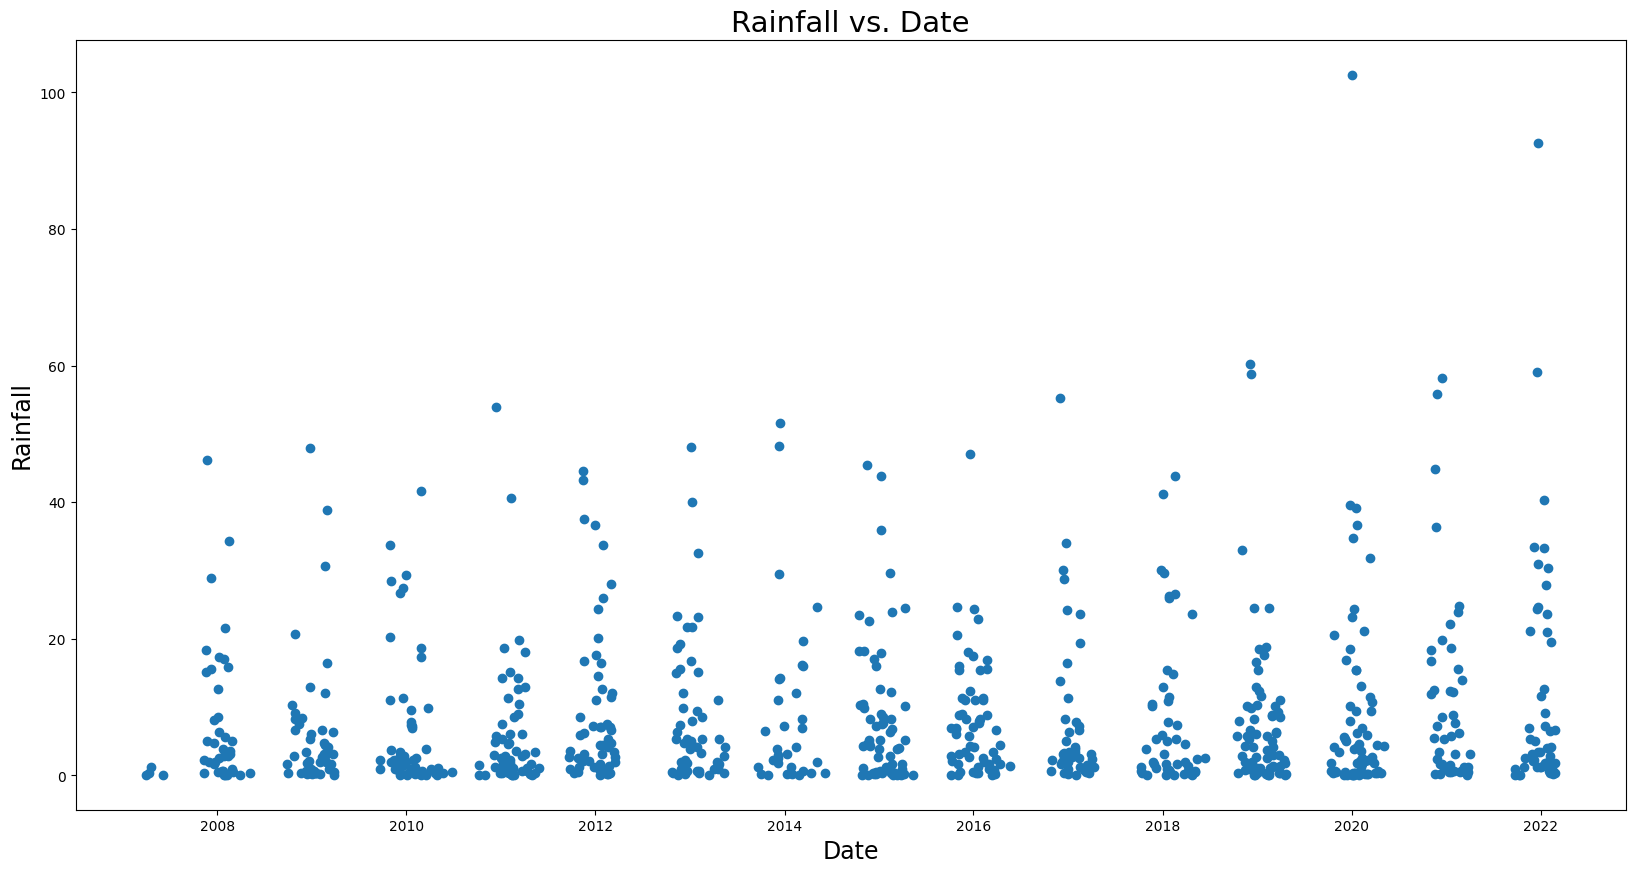

In [22]:
# Plot y_t versus t=`Date` and identify winter times
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.scatter(data['Date'].values, y_t)
plt.xlabel('Date', fontsize=17)
plt.ylabel('Rainfall', fontsize=17)
plt.title('Rainfall vs. Date', fontsize=21)
plt.show()

It's easy to see at every year when there is rainfall (a bit before every x-tick and more after it). This makes sense as December to March are the Winter months in Israel. but lets plot it

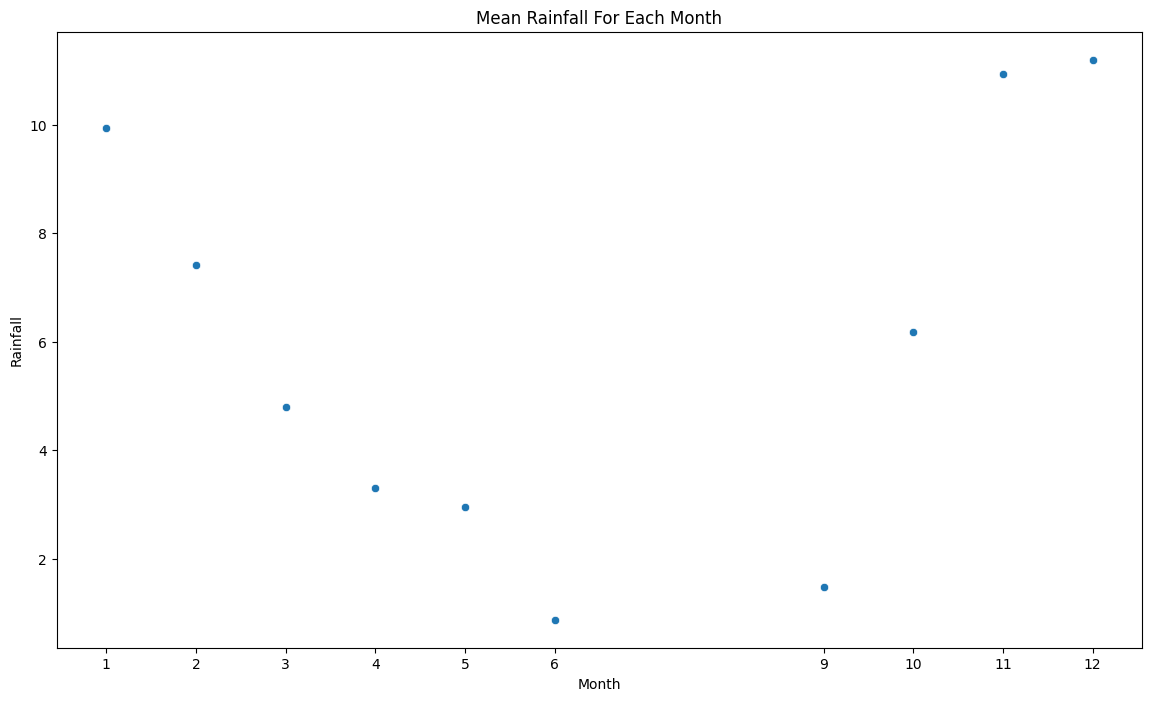

In [23]:
import seaborn as sns
# create a grouped dataframe
data_to_plot = data.groupby(by="Month").mean()
data_to_plot[["Rainfall"]]

# plot the mean of the rainfall per month
months = [1, 2, 3, 4, 5, 6, 9, 10, 11, 12]  # all months in the data
plt.figure(figsize=(14, 8))
sns.scatterplot(x=months, y=data_to_plot.Rainfall)
plt.title('Mean Rainfall for each Month'.title())
plt.xlabel('Month')
plt.xticks(months)
plt.ylabel('Rainfall')
plt.show()

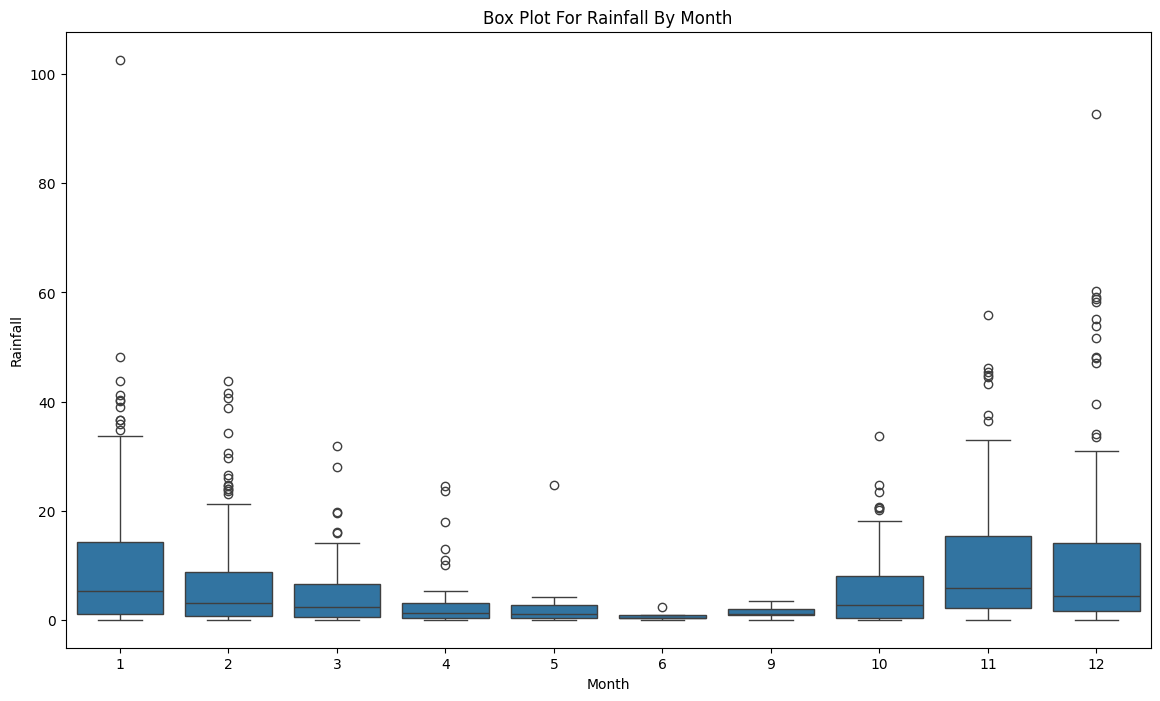

In [24]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Month", y="Rainfall", data=data)
plt.title('Box Plot for Rainfall by Month'.title())
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.show()

 July and August will probably contain the lowest amount of Rainfall.

1.2

$y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n.$

In [25]:
# Find the LS regression coefficients beta
import numpy as np


def least_squares(df, y):
    intercept = np.ones(len(df))
    Z = np.column_stack([intercept, df.values])  # assemble matrix Z
    y = y.values.reshape(-1, 1)  # turn y into a column vector
    betas = np.dot((np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)), y)
    y_hat = np.dot(Z, betas)
    return betas, y, y_hat, Z

In [26]:
tt = data['DayOfYear'].values
data['x1'] = np.cos(2 * np.pi * (tt / 365))
data['x2'] = np.sin(2 * np.pi * (tt / 365))
betas, y, y_hat, Z = least_squares(df=data[['x1', 'x2']], y=data['Rainfall'])

In [27]:
for i, feature in enumerate(['Intercept'] + ['x1', 'x2']):
    print(f'beta_{i} ({feature}) = {betas[i][0]}')

beta_0 (Intercept) = 4.872810383832401
beta_1 (x1) = 5.758049594113259
beta_2 (x2) = -1.2443305218468217


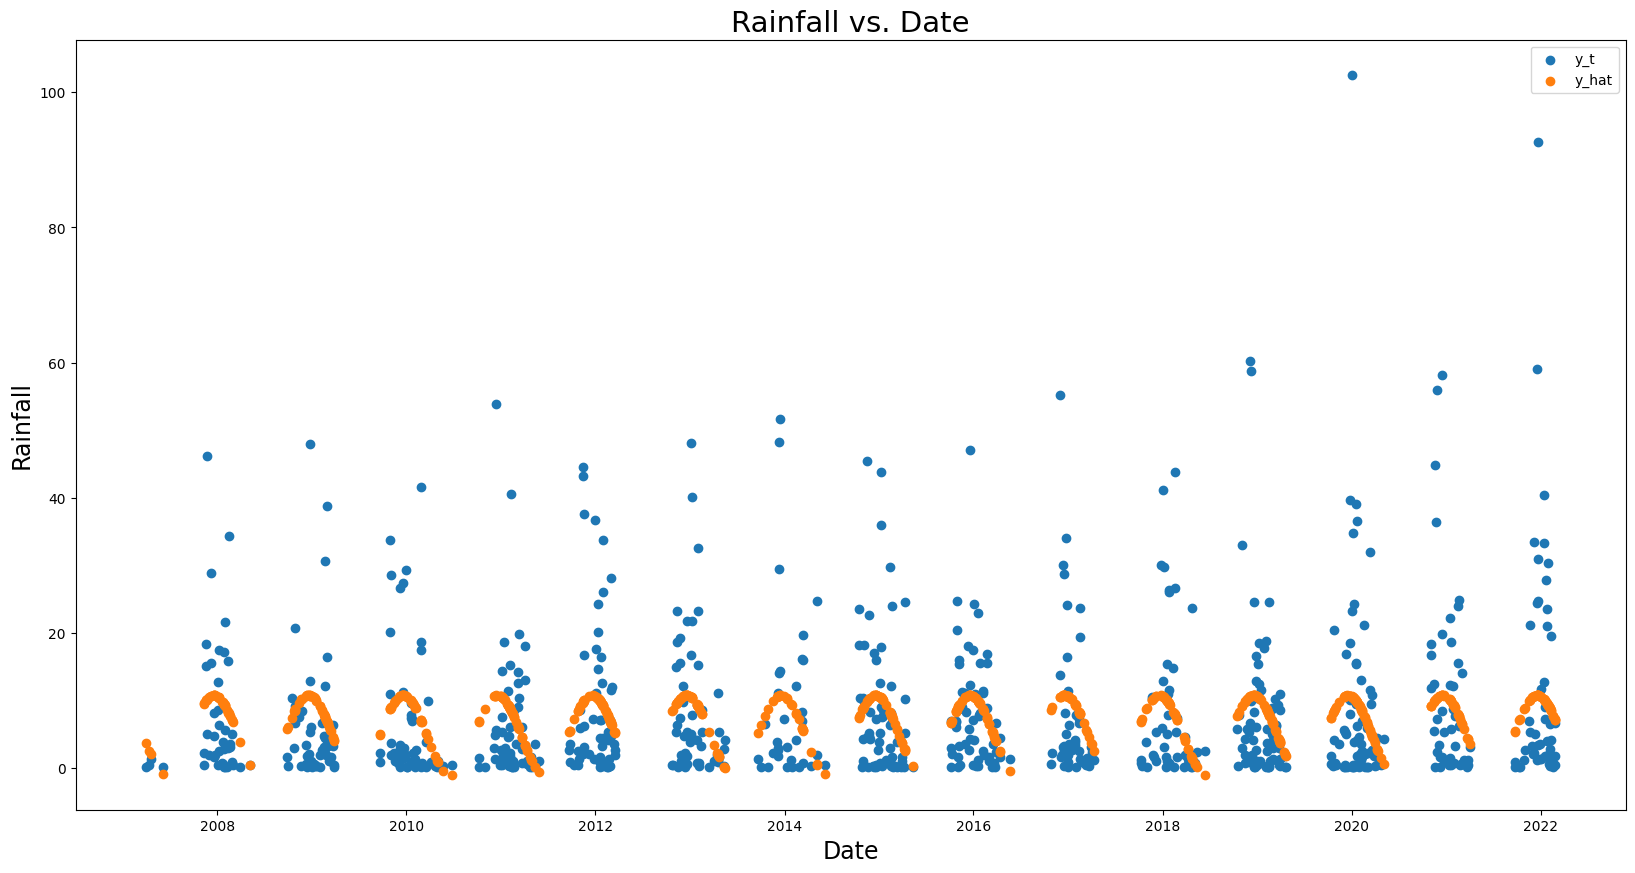

Model MSE: 131.96897515426156


In [28]:
# plot the fitted response \hat{y}_t over time along with the original response y_t
plt.figure(figsize=(20, 10))

plt.scatter(data['Date'].values, y_t, label='y_t')
plt.scatter(data['Date'].values, y_hat, label='y_hat')
plt.xlabel('Date', fontsize=17)
plt.ylabel('Rainfall', fontsize=17)
plt.title('Rainfall vs. Date', fontsize=21)
plt.legend()
plt.show()
print(f"Model MSE: {np.mean((y-y_hat)**2)}")

1.2.1

In [29]:
# approach 1: using statsmodels.formula
import statsmodels.formula.api as smf

fitted_model = smf.ols(formula='Rainfall ~ x1 + x2', data=data).fit()
trivial_model = smf.ols(formula='Rainfall ~ 1', data=data).fit()

f_statistic, p_value, _ = fitted_model.compare_f_test(trivial_model)
print(f'f_value = {f_statistic}')
print(f'p_value = {p_value}')

if p_value < 0.01:
    print('We can see that the fitted model **DOES** significantly improve on the trivial model')

f_value = 22.48433869494974
p_value = 3.1604632030878105e-10
We can see that the fitted model **DOES** significantly improve on the trivial model


In [30]:
# approach 2: explicit F statistic calculation
from scipy.stats import f

# Full Model
intercept = np.ones(len(data))
Z = np.column_stack([intercept, data['x1'], data['x2']])
y = data['Rainfall'].values.reshape(-1, 1)
betas = np.dot((np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)), y)
y_hat = np.dot(Z, betas)

# Trivial Model
Z_trivial = np.column_stack([intercept])
betas_trivial = np.dot((np.dot(np.linalg.inv(np.dot(Z_trivial.T, Z_trivial)), Z_trivial.T)), y)
y_hat_trivial = np.dot(Z_trivial, betas_trivial)

# Calculations
n, p = Z.shape
q = Z_trivial.shape[1]

SS_full = np.sum((y - y_hat)**2)
SS_sub = np.sum((y - y_hat_trivial)**2)

# F-statistic and p-value
f_statistic = ((SS_sub - SS_full) / (p - q)) / (SS_full / (n - p))
p_value = f.sf(f_statistic, p - q, n - p)

print(f'f_value = {f_statistic}')
print(f'p_value = {p_value}')

if p_value < 0.01:
    print('We can see that the fitted model **DOES** significantly improve on the trivial model')

f_value = 22.484338694949635
p_value = 3.160463203088102e-10
We can see that the fitted model **DOES** significantly improve on the trivial model


Therefore, it seems that the more complex model is significantly better and than the current (trivial) model.
the trivial model doesn't provide a valid representation of the data compared to the original larger one.

1.2.2

In [31]:
import scipy.stats as st

residuals = y - y_hat
n = len(y)
p = 3
s = np.sqrt(np.sum( residuals**2 )) / np.sqrt(n-p)
feat_set = ["Intercept", "cos", "sin"]

p_values = np.array([])
for i, beta in enumerate(betas):
    c = [0] * p
    c[i] = 1
    c_arr = np.array(c)

    numerator = beta - 0  # our hypothesis is that Beta_j = 0
    denominator = s * np.sqrt( c_arr.T @ np.linalg.inv(np.dot(Z.T, Z)) @ c_arr )

    t = numerator / denominator

    p_value = 2*st.t.sf(t, df=n-p)
    p_values = np.append(p_values, p_value)


p_values = [p_val if p_val <= 1 else 2-p_val for p_val in p_values]

for feature, p_val in zip(feat_set, p_values):

    print(f"For feature: {feature}, this is the p-value: {p_val:.4f}, is significant = {p_val <= 0.01}")

For feature: Intercept, this is the p-value: 0.0000, is significant = True
For feature: cos, this is the p-value: 0.0000, is significant = True
For feature: sin, this is the p-value: 0.0658, is significant = False


In [32]:

model = smf.ols(formula="Rainfall ~  + x1 + x2", data=data).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     22.48
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           3.16e-10
Time:                        10:20:58   Log-Likelihood:                -3099.8
No. Observations:                 803   AIC:                             6206.
Df Residuals:                     800   BIC:                             6220.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8728      0.805      6.053      0.000       3.293       6.453
x1             5.7580      1.027      5.604      0.000       3.741       7.775
x2            -1.2443      0.675     -1.842      0.066      -2.570       0.081
==============================================================================
Omnibus:                      486.099   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4749.241
Skew:                           2.635   Prob(JB):                         0.00
Kurtosis:                      13.686   Cond. No.                         3.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.1
</br>

We know that
$$
\begin{align*}
\mathrm{Cov}(y-\hat{y}, y_{new} - \hat{y}_{new}) & =
\mathrm{Cov}(\hat{\epsilon}, Z_{new} \beta + \epsilon_{new} - Z_{new}\hat{\beta}) \\
& = \mathrm{Cov}(\hat{\epsilon}, \epsilon_{new} ) - \mathrm{Cov}(\hat{\epsilon}, Z_{new} \hat{\beta} )
\end{align*}
$$

(where the last transition is beacuse that only $\hat{\beta}$, $\epsilon_{new}$, and $\hat{\epsilon}$ are random variable)
 <br>

$$
=
\mathrm(\hat{\epsilon}, \epsilon_{new}) - \mathrm(\hat{\epsilon}, \hat{\beta}) Z_{new}^T
$$

note that $\hat{\epsilon}$, $\hat{\beta}$, are indepndent, so their covariance is 0.  


$$
=
\begin{align*}
\mathrm(\hat{\epsilon}, \epsilon_{new}) - \mathrm(\hat{\epsilon}, \hat{\beta}) Z_{new}^T = \mathrm(\hat{\epsilon}, \epsilon_{new}) - 0 = \mathrm{Cov}(Z \beta + \epsilon - Z \hat{\beta}, \epsilon_{new})
\end{align*}
$$
Again, $Z \beta$ is not an RV, so:

$$
=
cov(\epsilon, \epsilon_{new}) - cov(Z \hat{\beta}, \epsilon_{new})
=
cov(\epsilon, \epsilon_{new}) - Z \cdot cov(\hat{\beta}, \epsilon_{new})
$$

We know that $\epsilon$, $\epsilon_{new}$, are indepndent, so their covariance is 0.  

$$
=
-Z cov(\hat{\beta}, \epsilon_{new})
=
-Z cov((Z^t Z)^{-1} Z^T \cdot y, \epsilon_{new})
=
[-Z (Z^t Z)^{-1} Z^T] \cdot cov(y, \epsilon_{new})
=
[-Z (Z^t Z)^{-1} Z^T] \cdot cov(Z \beta + \epsilon, \epsilon_{new})
$$


Again, $Z \beta$ is not an RV, so:

$$
cov(y - \hat{y}, y_{new} - \hat{y}_{new})
=
[-Z (Z^t Z)^{-1} Z^T] \cdot cov(\epsilon, \epsilon_{new})
$$

We know that $\epsilon$, $\epsilon_{new}$, are indepndent, so their covariance is 0.  

$$
cov(y - \hat{y}, y_{new} - \hat{y}_{new}) = 0
$$


2.2

$$
y_{new} - \hat{y}_{new}
=
Z_{new} \beta + \epsilon_{new} - Z_{new} \hat{\beta}
$$

Also, we know that:
$$
\hat{\beta} \sim \mathcal N(\beta, \sigma^2 (Z^t Z)^{-1})
$$  

$$
Z_{new} \hat{\beta} \sim \mathcal N(Z_{new} \beta, Z_{new} \sigma^2 (Z^t Z)^{-1} Z_{new}^T)
$$  

Also, we know that:
$$
\epsilon_{new} \sim \mathcal N(0, \sigma^2 I)
$$
And that:
$$
cov(\epsilon_{new}, \hat{\beta}) = 0
$$  

Hence

$$
y_{new} - \hat{y}_{new}
\sim
\mathcal N(0, \sigma^2 (I - Z_{new} (Z^t Z)^{-1} Z_{new}^T))
$$

$$
M(y_{new} - \hat{y}_{new})
\sim
\mathcal N(0, \sigma^2 M (I - Z_{new} (Z^t Z)^{-1} Z_{new}^T) M^T)
$$

$$
\sigma^2 M (I - Z_{new} (Z^t Z)^{-1} Z_{new}^T) M^T = \sigma^2 I
$$  

$$
M (I - Z_{new} (Z^t Z)^{-1} Z_{new}^T) M^T = I
$$  

Define
$$
R = I - Z_{new} (Z^t Z)^{-1} Z_{new}^T
$$

Finally,

$$
M \cdot R \cdot M^T = I
$$


2.3
$$
\left\| M(Y_{new} - \hat{Y}_{new})\right\|^2
$$
is a sum of squares of normal RVs (from the last sections).  
It's distributed with a $\chi^2$ distribution.

$$
\left\| Y  - \hat{Y} \right\|^2
$$ Are simply $\hat{\epsilon}$, which we know are normal RVs.

So, same here

It's distributed with a $\chi^2$ distribution.

To conclude,
$$
A \sim F(n, m-d)
$$

2.4

In [33]:
import scipy



def get_M(Z, Z_new):
    n = len(Z_new)
    I = np.identity(n)

    R = I - Z_new @ np.linalg.inv(Z.T @ Z) @ Z_new.T
    R_inv = np.linalg.inv(R)

    M = scipy.linalg.solve_continuous_are(a=np.zeros_like(I), b=I, r=R_inv, q=I)

    return M

def get_A_statistic(M, y, y_hat, y_new, y_new_hat):
    n = len(Z_new)
    m, p = Z.shape

    num = (1/n) * np.inner(M @ (y_new - y_new_hat), M @ (y_new - y_new_hat))
    denom = (1 / (m-p)) * np.inner(y - y_hat, y - y_hat)

    A_statistic = num / denom

    return A_statistic



# main loop
p_values = list()

for year in range(2010, 2022):
    prior_data = data[data["Year"] <= year]
    y = prior_data['Rainfall'].values
    Z = np.column_stack(
        (np.ones_like(y),
        prior_data["x1"].values,
        prior_data["x2"].values)
    )

    # get beta hat
    A = np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)
    beta_hat = np.dot(A, y)

    y_hat = Z @ beta_hat

    year_data = data[data["Year"] == year]
    y_new = year_data['Rainfall'].values
    Z_new = np.column_stack(
        (np.ones_like(y_new),
        year_data["x1"].values,
        year_data["x2"].values)
    )
    y_new_hat = Z_new @ beta_hat  # use the beta hat that was previously calculated

    M = get_M(Z, Z_new)

    A_stat = get_A_statistic(M, y, y_hat, y_new, y_new_hat)  # aka f statistic

    n = len(Z_new)
    m, p = Z.shape
    p_value = scipy.stats.f.sf(A_stat, n, m-p)

    p_values.append(p_value)

    print(f" For Year = {year}, A statistic = {A_stat:.4f}, and p-value = {p_value:.4f}\n")



 For Year = 2010, A statistic = 1.1185, and p-value = 0.3113

 For Year = 2011, A statistic = 0.9428, and p-value = 0.6048

 For Year = 2012, A statistic = 0.8057, and p-value = 0.8518

 For Year = 2013, A statistic = 1.6013, and p-value = 0.0103

 For Year = 2014, A statistic = 0.9026, and p-value = 0.6469

 For Year = 2015, A statistic = 0.9318, and p-value = 0.6288

 For Year = 2016, A statistic = 0.9995, and p-value = 0.4787

 For Year = 2017, A statistic = 0.4732, and p-value = 0.9968

 For Year = 2018, A statistic = 1.6212, and p-value = 0.0024

 For Year = 2019, A statistic = 0.5316, and p-value = 0.9988

 For Year = 2020, A statistic = 2.4645, and p-value = 0.0000

 For Year = 2021, A statistic = 2.0122, and p-value = 0.0001



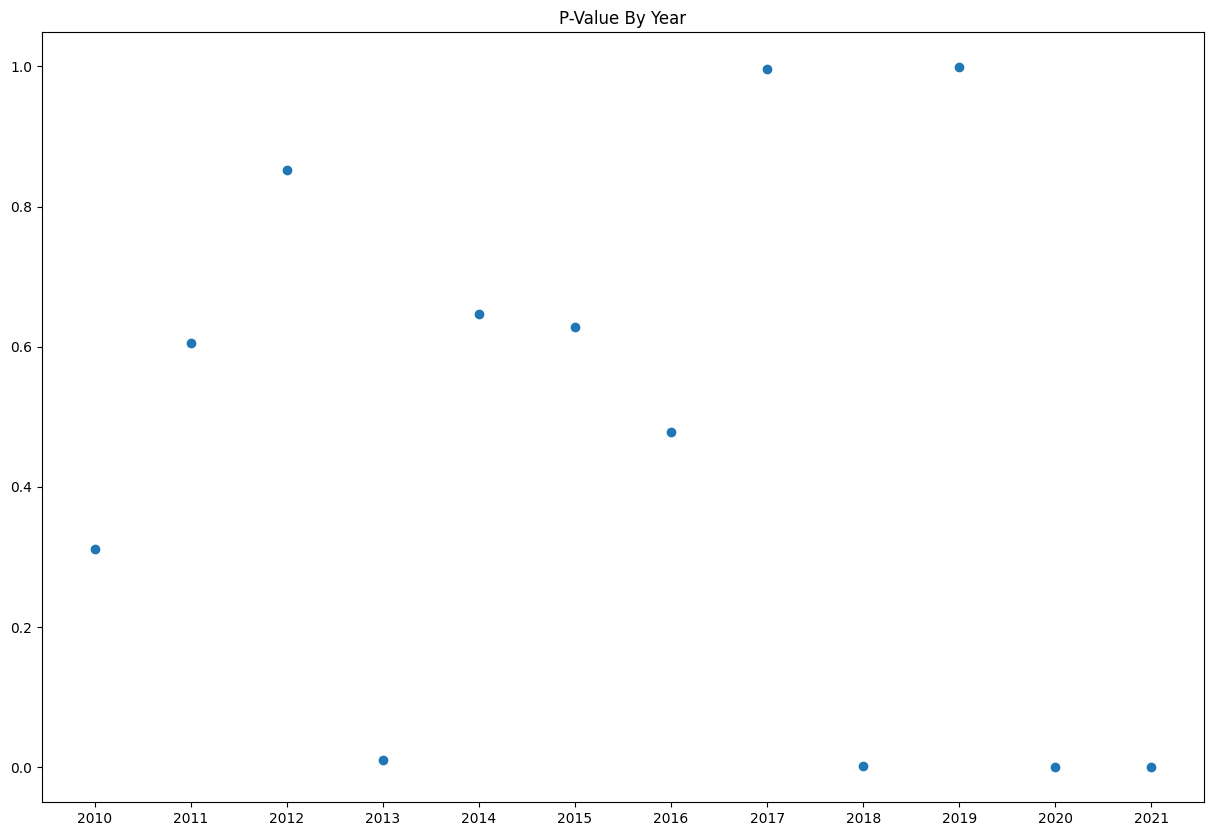

In [34]:
# plot

years_list = list(range(2010, 2022))

plt.rcParams['figure.figsize'] =  [15, 10]
f, ax = plt.subplots(1, 1)

plt.scatter(years_list, p_values)
plt.xticks(years_list)
plt.title("P-value by Year".title())

plt.show()

It seems that most of the p-values are not significant. However, there are some years with a very significant p-value (< 0.001) - 4 years to be exact.
SO - if we'll take each test seperately, with alpha = 0.05, we'll reject the null hypothisis for years 2013, 2018, 2020, 2021.
The p-values over time doesn't seem to have some kind of pattern to it.


2.5<br>
NO. Let's start by pointing the definition of p-value:
it is the probability of obtaining the observed results or even more extreme, assuming that the null hypothesis is true. (in our case: Rainfall is not changing over time).
<br>
So, that's enough for the answer to be negative.
<br>
BUT - we need to point out another fact, and that's p-hacking. When you do a lot of tests (12 in our case), then it is more likely, that some test will result in a p-value under the alpha you defined. So, there is a need to be even more careful when connducting a lot of tests.
<br>
There are a lot of ways to deal with them, for example, "normlizing" the p-values needed for rejecting the null hypothisis, or reporting an FDR value (False discovery rate).

3.1<br>Two-sample t-test


In [35]:
from scipy.stats import t

feb_data = data[data.Month == 2]
dec_data = data[data.Month == 12]

# group by year
feb_data_grouped_summed_yearly = feb_data.groupby("Year")['Rainfall'].sum().values
dec_data_grouped_summed_yearly = dec_data.groupby("Year")['Rainfall'].sum().values

# calc means
feb_total_rainfall_mean = feb_data_grouped_summed_yearly.mean()
dec_total_rainfall_mean = dec_data_grouped_summed_yearly.mean()

# calc stds
feb_total_rainfall_std = np.std(feb_data_grouped_summed_yearly)
dec_total_rainfall_std = np.std(dec_data_grouped_summed_yearly)

# calc dof
feb_n = len(feb_data_grouped_summed_yearly)
dec_n = len(dec_data_grouped_summed_yearly)
dof = feb_n + dec_n - 2

# calc t-statistic

s = np.sqrt(  ( ( (feb_n) * feb_total_rainfall_std**2) + ( (dec_n) * dec_total_rainfall_std**2 ) ) / dof )

t_statistic = abs( (dec_total_rainfall_mean - feb_total_rainfall_mean) / ( s * np.sqrt((1/dec_n) + (1/feb_n))))

# p_value
p_val = t.sf(t_statistic, dof)


print(f"In a Two-sample t-test, the t-statistic = {t_statistic:.3f}, p-value = {p_val:.4f}, hence, we reject H0")


In a Two-sample t-test, the t-statistic = 2.089, p-value = 0.0230, hence, we reject H0


In [36]:
#test
from scipy.stats import ttest_ind as ttest

t_statistic, p_val = ttest(dec_data_grouped_summed_yearly, feb_data_grouped_summed_yearly, equal_var=False, alternative="greater")

print(f"In a Two-sample t-test, using scipy.stats the t-statistic = {t_statistic:.3f}, p-value = {p_val:.4f}, hence, we reject H0")

In a Two-sample t-test, using scipy.stats the t-statistic = 2.089, p-value = 0.0261, hence, we reject H0


3.2<br>
Paired t-test


In [37]:
from scipy.stats import ttest_rel as ttest_paired


t_statistic, p_val = ttest_paired(dec_data_grouped_summed_yearly, feb_data_grouped_summed_yearly, alternative="greater")

print(f"In a paired t-test, using scipy.stats the t-statistic = {t_statistic:.3f}, p-value = {p_val:.4f}, hence, we reject H0")

In a paired t-test, using scipy.stats the t-statistic = 1.868, p-value = 0.0415, hence, we reject H0


3.3<br>
In general, paired t test is more powerfull, because we use more information that we have. The main upside of it comes from the fact that the samples each year might be dependant some how (for example, one year was extra rainy); In that case, a paired t-test is a stronger choice. On the other hand, most of the years wasn't significantly different than the one before them, so it shouldn't be much of a difference between the 2 test types (there is, a small one though of 0.015 in the p-value). To conclude: I'd use a paired t-test, because I don't see a downside for it.